In [9]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import tensorflow as tf

from six.moves import xrange  # pylint: disable=redefined-builtin
from matplotlib import pyplot as plt

import glob
import numpy as np
import pandas as pd
import random
from scipy.misc import imread

%matplotlib inline
sess = tf.InteractiveSession()

In [10]:
select = 500 # Only load 500 images for speed
# Data loading
train_files = sorted(glob.glob('./input/train/*/*.jpg'), key=lambda x: random.random())[:select]
train = np.array([imread(img) for img in train_files])
print('Length of train {}'.format(len(train)))

Length of train 500


In [68]:
# Function to show 4 images
def show_four(imgs, label, title):
    #select_imgs = [np.random.choice(imgs) for _ in range(4)]
    #select_imgs = [imgs[np.random.choice(len(imgs))] for _ in range(4)]
    select_index = [np.random.choice(len(imgs)) for _ in range(4)]
    select_imgs = imgs[select_index]
    select_label = label[select_index]
    _, ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(20, 3))
    title = " | ".join(select_label.tolist()) + " " + title
    plt.suptitle(title, size=14)
    for i, img in enumerate(select_imgs):
        ax[i].imshow(img)

# Function to show 8 images
def show_eight(imgs, title):
    select_imgs = [imgs[np.random.choice(len(imgs))] for _ in range(8)]
    _, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(20, 6))
    plt.suptitle(title, size=20)
    for i, img in enumerate(select_imgs):
        ax[i // 4, i % 4].imshow(img)

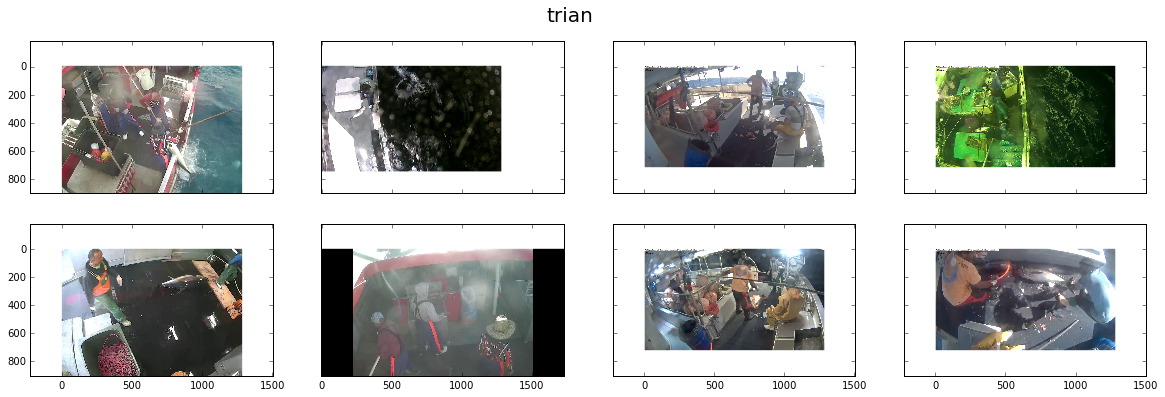

In [12]:
show_eight(train, "trian")

In [59]:
#train_label = np.array([file.split('/')[-2] for file in train_files])
train_label = np.array(['/'.join(file.split('/')[-2:]) for file in train_files])
print('Sizes in train:')
shapes = np.array([str(img.shape) for img in train])
pd.Series(shapes).value_counts()

Sizes in train:


(720, 1280, 3)    280
(750, 1280, 3)     84
(974, 1280, 3)     49
(718, 1276, 3)     38
(670, 1192, 3)     29
(924, 1280, 3)      6
(854, 1518, 3)      5
(700, 1244, 3)      4
(974, 1732, 3)      3
(750, 1334, 3)      2
dtype: int64

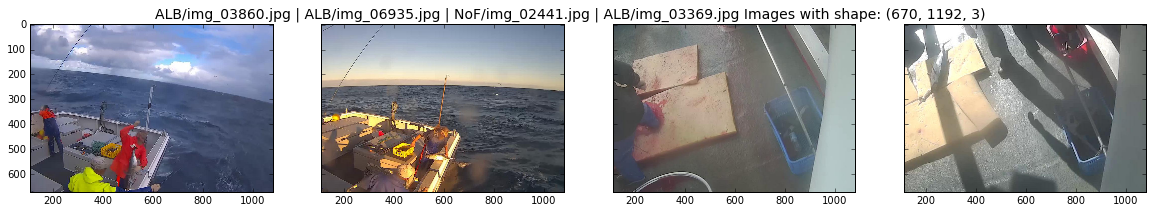

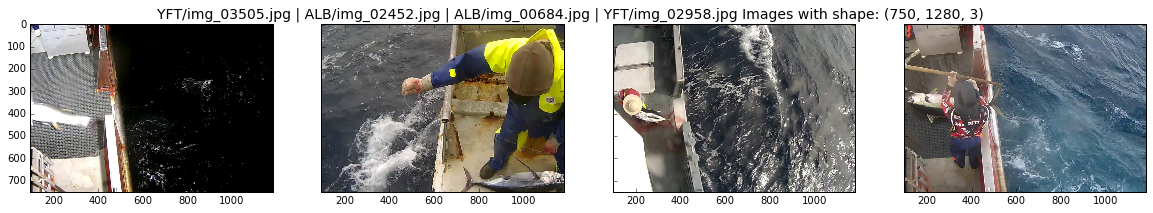

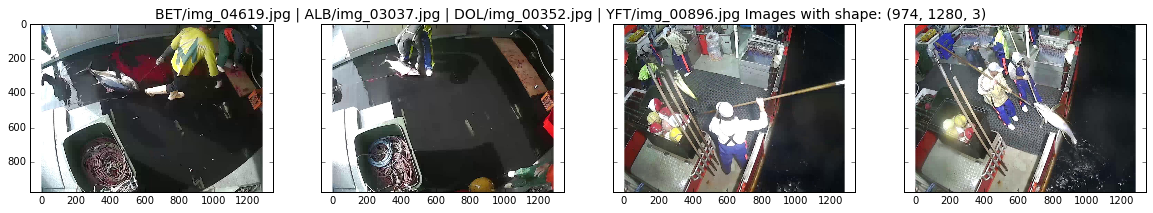

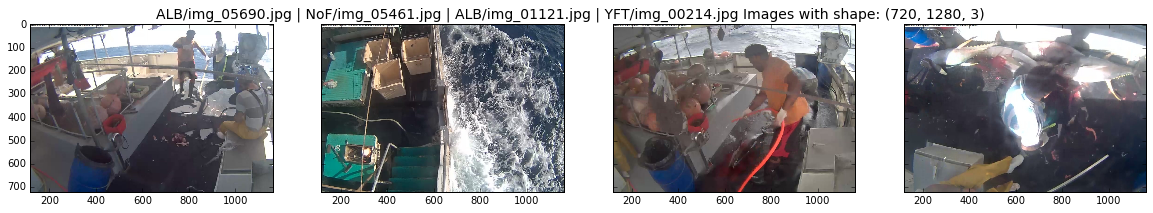

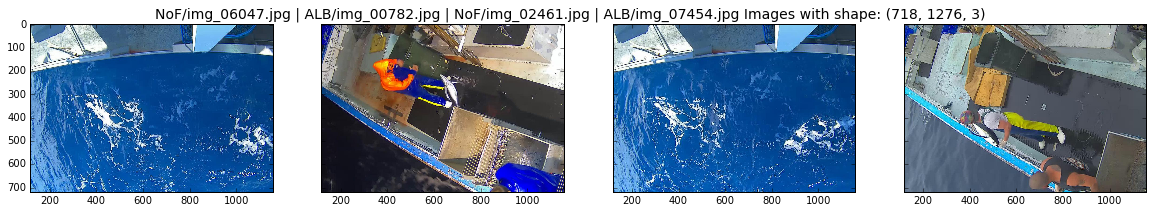

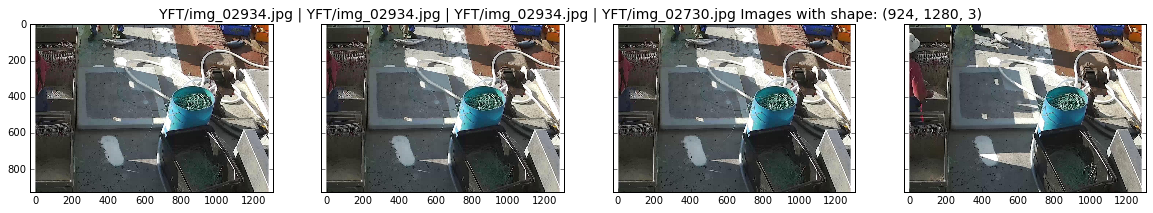

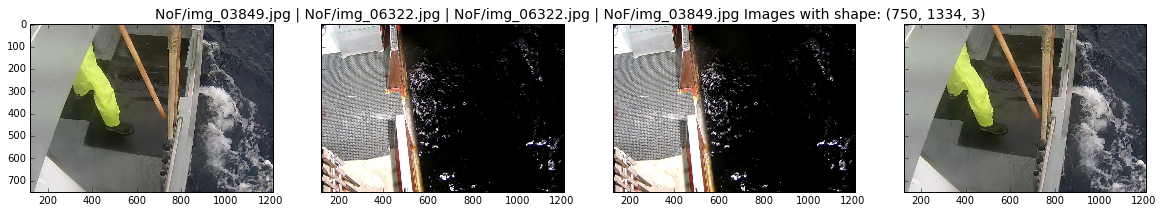

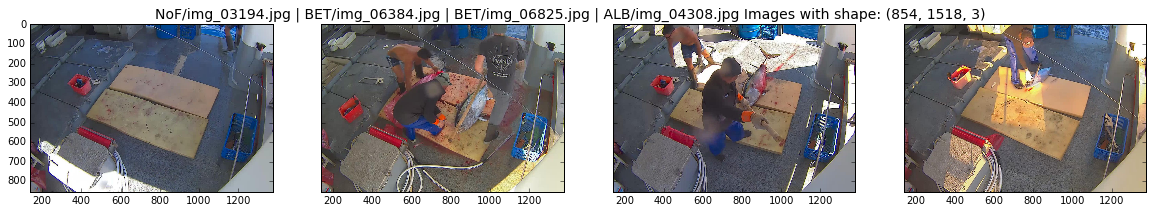

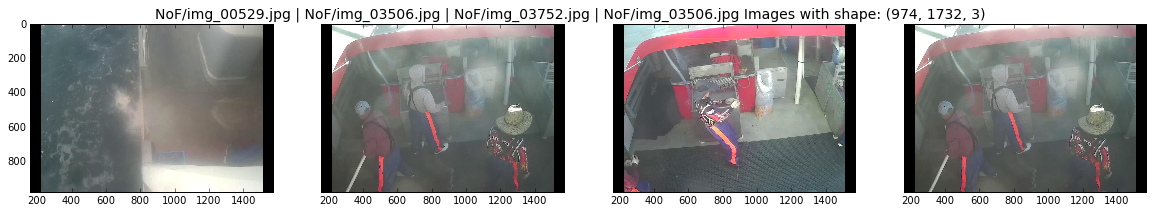

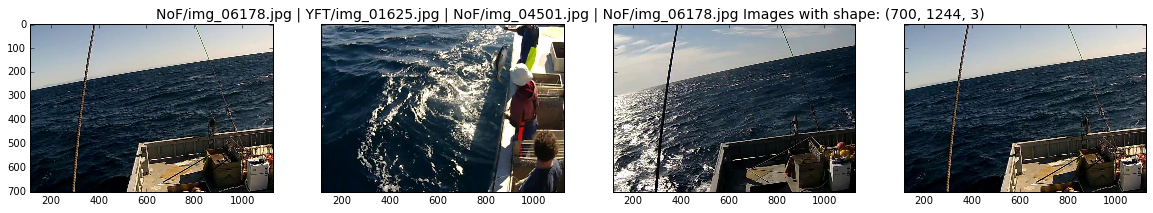

In [100]:
for uniq in pd.Series(shapes).unique():
    show_four(train[shapes == uniq], train_label[shapes == uniq], 'Images with shape: {}'.format(uniq))
    plt.show()

In [3]:
filename_lst = glob.glob("./input/train/*/*.jpg")

In [4]:
filename_que = tf.train.string_input_producer(filename_lst)

In [60]:
ind = [np.random.choice(90) for _ in range(4)]
lab = train_label[ind]

In [61]:
" ".join(lab.tolist())

'ALB/img_05067.jpg ALB/img_02326.jpg ALB/img_05980.jpg ALB/img_02586.jpg'